In [48]:
import basedosdados as bd
import numpy as np
import pandas as pd
import plotly.express as px

import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

import seaborn as sns
pd.options.display.max_columns = 999
pd.options.display.max_rows = 1999

In [2]:
query = """
SELECT * FROM `basedosdados.mundo_transfermarkt_competicoes.brasileirao_serie_a`
"""
df = bd.read_sql(query, billing_project_id='basedosdados')

Downloading: 100%|██████████| 7030/7030 [00:04<00:00, 1689.24rows/s]


In [3]:
# # def co
# def plt_hist(df,col,man_vis=False):
#     ddf = pd.DataFrame()
#     cols=[col]
#     if man_vis:
#         value = col
#         cols = [f'{value}_vis',f'{value}_man']
#     for col in cols:
#         dd = df[[col]].copy()
#         dd=dd.rename(columns={col:value})
#         dd['tipo'] = col
#         ddf = pd.concat([ddf,dd],0)
    

#     return ddf

In [119]:
def get_min_max(df,col):
    vmin = 0
    vmax = 0
    years=[]
    for ano in df['ano_campeonato'].unique().tolist():
        mask = df['ano_campeonato']==ano
        dd = df[mask].copy()
        if (dd[f"{col}_vis"].sum()!=0) & (dd[f"{col}_man"].sum()!=0):
            print(ano)
            df_heatmap = (pd.crosstab(dd[f"{col}_vis"], dd[f"{col}_man"]))
            df_heatmap = df_heatmap[df_heatmap.columns[:5]].head(5)

            max_now = df_heatmap.to_numpy().max()
            min_now = df_heatmap.to_numpy().min()

            vmax = max_now if max_now > vmax else vmax
            vmin = min_now if min_now < vmin else vmin
#         print(vmin)
            years.append(ano)
    return vmin, vmax, years

In [120]:
col = 'chutes'
vmin, vmax, years = get_min_max(df,col)


2018
2019
2020


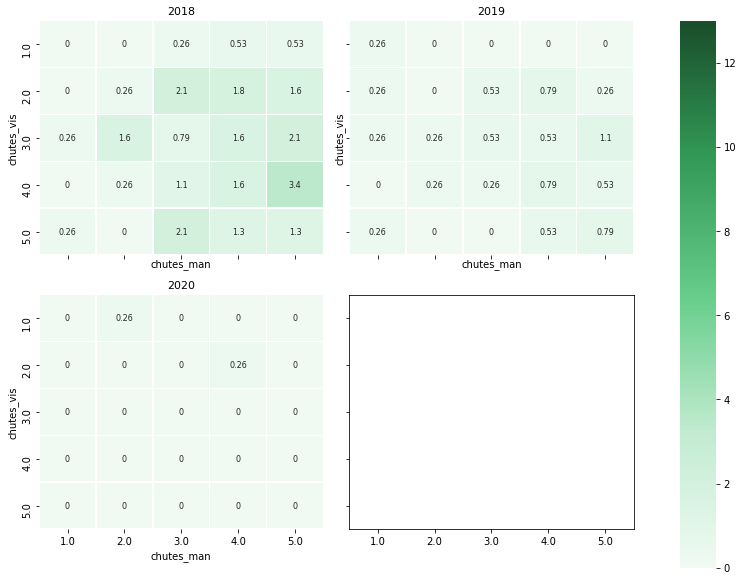

In [121]:
d=2
fig = plt.figure(figsize=(5*d,4*d))  
axn = fig.subplots(2, 2, sharex=True, sharey=True)
cbar_ax = fig.add_axes([0.95, 0.007, 0.05, 0.95])
i=0
for ax,ano in zip(axn.flat,years):
    mask = df['ano_campeonato']==ano
    df_heatmap = round(pd.crosstab(df[mask][f"{col}_vis"], df[mask][f"{col}_man"]).div(len(df[mask].index))*100,2)
    df_heatmap = df_heatmap[df_heatmap.columns[:5]].head(5)
    sns.heatmap(df_heatmap,
                ax=ax,
                cbar=i == 0,
                cbar_ax=None if i else cbar_ax,
                vmin=vmin,
                vmax=vmax,
                linewidths=.5,
                cmap=cmap,
                annot=True,
                annot_kws={"fontsize":8},
    )
    ax.set_title(ano,fontsize=11)
#     ax.axes.get_xaxis().set_visible(False)
#     ax.axes.get_yaxis().set_visible(False)
#     ax.set_xlabel('', fontsize=20)
#     ax.set_ylabel('', fontsize=20)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.margins(x=0, y=0)

    i+=1
fig.tight_layout(rect=[0, 0, .9, 1])

# axn.flat[18].axis('off')
# axn.flat[19].axis('off')

# plt.savefig(f'../images/brasileirao/distribuicao_{col}_brasileirao.png',dpi=100, transparent=True, bbox_inches = 'tight', pad_inches = 0)

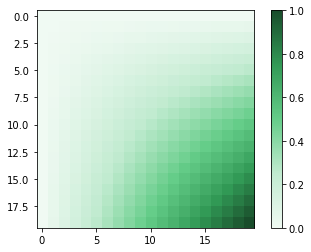

In [73]:
from matplotlib.colors import LinearSegmentedColormap
paleta = ['#F0FAF3','#C1EBD0','#65CD89','#329A56','#194D2B']
cmap = LinearSegmentedColormap.from_list('bdmais',paleta)

a = np.outer(np.linspace(0, 1, 20), np.linspace(0, 1, 20))
im = plt.imshow(a, cmap=cmap)
plt.colorbar(im)
plt.show()